In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

In [2]:
# Importing dataset and first impressions
# Variable Identification
# Univariate & Bivarite Analysis : Numerical Variables & Categorical Variables One By One
# Summary of Univariate and Bivariate Analysis 
# Checking NA val

In [3]:
# Reading Data Set - UCI 
df = pd.read_csv("data/adult.data",names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary Greater than 50k Or Not'])

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary Greater than 50k Or Not
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
# Checking Is there Any NA values 
df.isna().sum()
# No Na values 

age                               0
workclass                         0
fnlwgt                            0
education                         0
education-num                     0
marital-status                    0
occupation                        0
relationship                      0
race                              0
sex                               0
capital-gain                      0
capital-loss                      0
hours-per-week                    0
native-country                    0
Salary Greater than 50k Or Not    0
dtype: int64

In [7]:
# Variable Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   age                             32561 non-null  int64 
 1   workclass                       32561 non-null  object
 2   fnlwgt                          32561 non-null  int64 
 3   education                       32561 non-null  object
 4   education-num                   32561 non-null  int64 
 5   marital-status                  32561 non-null  object
 6   occupation                      32561 non-null  object
 7   relationship                    32561 non-null  object
 8   race                            32561 non-null  object
 9   sex                             32561 non-null  object
 10  capital-gain                    32561 non-null  int64 
 11  capital-loss                    32561 non-null  int64 
 12  hours-per-week                  32561 non-null

In [8]:
# Question we can find from this 

# Is age matter in salary !
# Is Education matter in salary !!
# Is occupation matter in salary !
# How Males and Females are has more Salary!
# Which Natives Country has salary greater than 50k or not !!
# Is race mattern in salary !
# How many Hours per week they were working and there salary !
# How capital Gain they have and its salary !
# How capital loss they have and there salary !!
# Which kind of people or relationship people have higher or lower salary !
# is Fnlwgt matter in salary !
# How Many work class people has salary 50 k or Not !
# Is Education Num mattern in Salary !
# How many Marital Status has greater Salary or not!

In [9]:
df['Salary Greater than 50k Or Not'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [10]:
# Start with seeing Dependent Feature 
df['Salary Greater than 50k Or Not'].value_counts()

 <=50K    24720
 >50K      7841
Name: Salary Greater than 50k Or Not, dtype: int64

In [11]:
salary = {" <=50K":1 ," >50K":0}
df['Salary Greater than 50k Or Not'] = df['Salary Greater than 50k Or Not'].map(salary)

In [12]:
# Columns check 
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Salary Greater than 50k Or Not'],
      dtype='object')

In [13]:
def Bivariate_cont_cat(data, cont, cat):
    plt.figure(figsize=(20,10))
    table = pd.pivot_table(data=data, values=cont, columns=cat,aggfunc=np.mean)
    print(table)
    sns.barplot(table)
    plt.show()
    sns.boxplot(x=cat, y=cont, data=data)
    plt.show()
    
    
def BVA_categorical_plot(data, tar, cat):
    data = data[[cat,tar]][:]
    table = pd.crosstab(data[tar],data[cat],)
    print(table)
    #plotting grouped plot
    plt.figure(figsize=(15,8))
    sns.countplot(x=cat,hue=tar, data=data)
    plt.show()

Salary Greater than 50k Or Not          0          1
age                             44.249841  36.783738


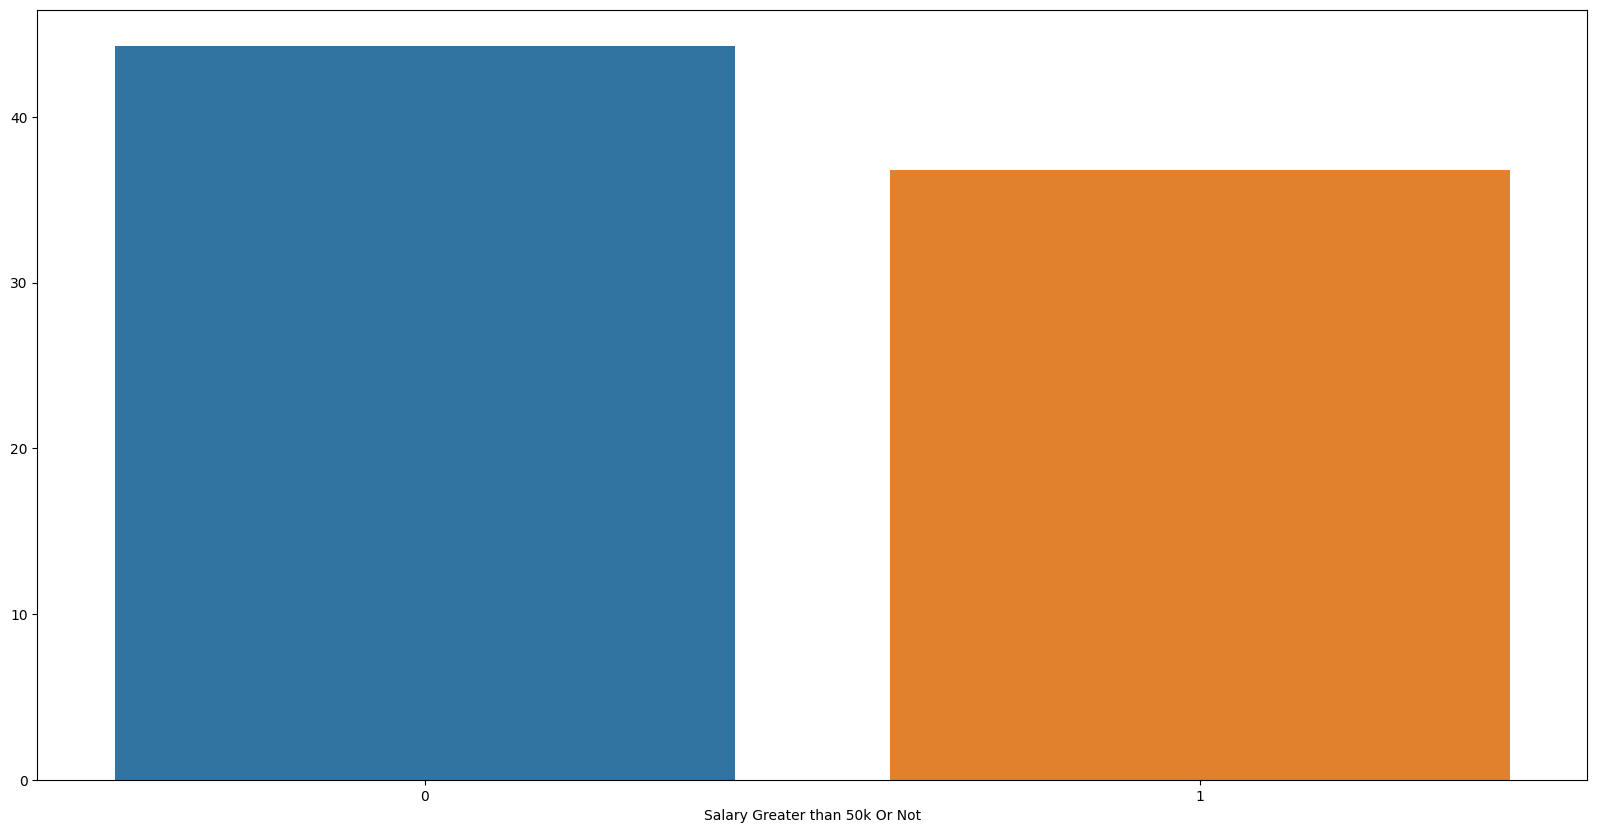

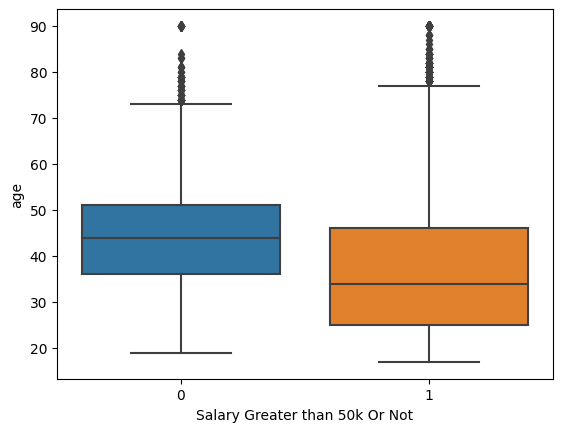

                                     age  Salary Greater than 50k Or Not
age                             1.000000                       -0.234037
Salary Greater than 50k Or Not -0.234037                        1.000000


In [14]:
# Is age matter in salary !
Bivariate_cont_cat(df,'age','Salary Greater than 50k Or Not')

print(df[['age','Salary Greater than 50k Or Not']].corr())
#Salary and age there is no correlation but with Visualization we can see >40 age has >50K salary 

Salary Greater than 50k Or Not     0     1
education                                 
 10th                             62   871
 11th                             60  1115
 12th                             33   400
 1st-4th                           6   162
 5th-6th                          16   317
 7th-8th                          40   606
 9th                              27   487
 Assoc-acdm                      265   802
 Assoc-voc                       361  1021
 Bachelors                      2221  3134
 Doctorate                       306   107
 HS-grad                        1675  8826
 Masters                         959   764
 Preschool                         0    51
 Prof-school                     423   153
 Some-college                   1387  5904


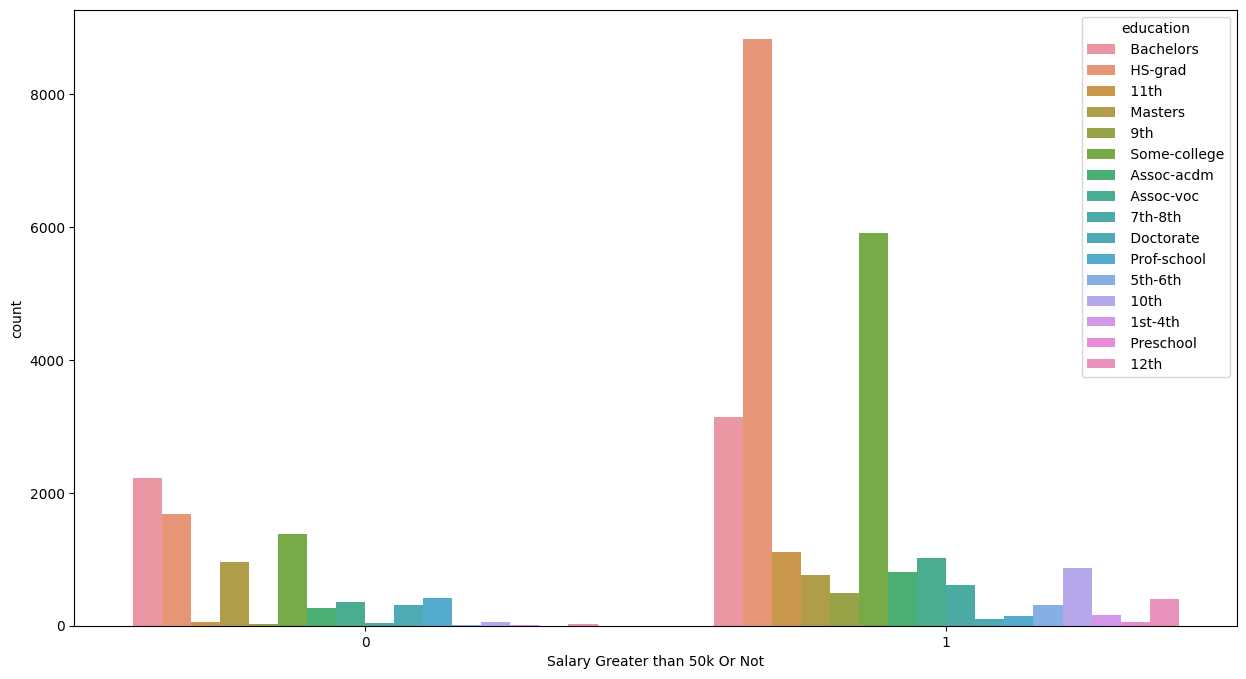

In [15]:
# Is Education matter in salary !!
BVA_categorical_plot(df,'education','Salary Greater than 50k Or Not')
# Most of Person the HS-Grad who has < 50 salary

Salary Greater than 50k Or Not     0     1
occupation                                
 ?                               191  1652
 Adm-clerical                    507  3263
 Armed-Forces                      1     8
 Craft-repair                    929  3170
 Exec-managerial                1968  2098
 Farming-fishing                 115   879
 Handlers-cleaners                86  1284
 Machine-op-inspct               250  1752
 Other-service                   137  3158
 Priv-house-serv                   1   148
 Prof-specialty                 1859  2281
 Protective-serv                 211   438
 Sales                           983  2667
 Tech-support                    283   645
 Transport-moving                320  1277


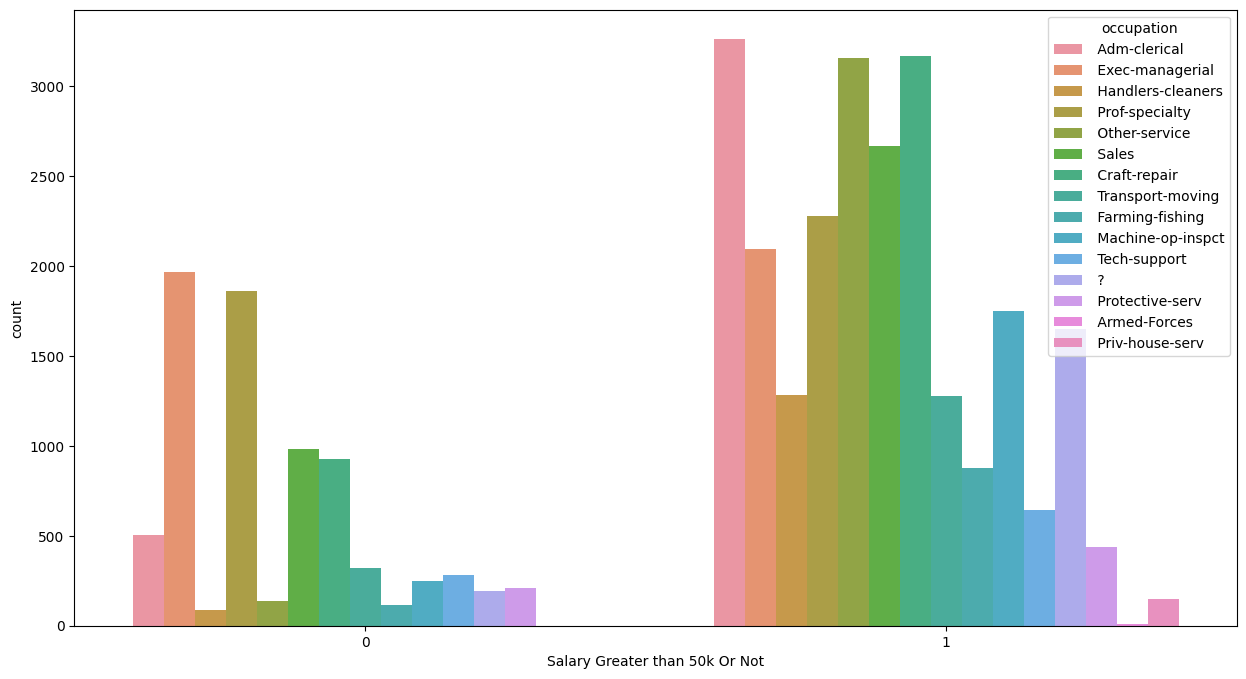

In [16]:
# Is occupation matter in salary !
BVA_categorical_plot(df,'occupation','Salary Greater than 50k Or Not')

# No of Occupation are more in case <= 50k salary 

Salary Greater than 50k Or Not     0      1
sex                                        
 Female                         1179   9592
 Male                           6662  15128


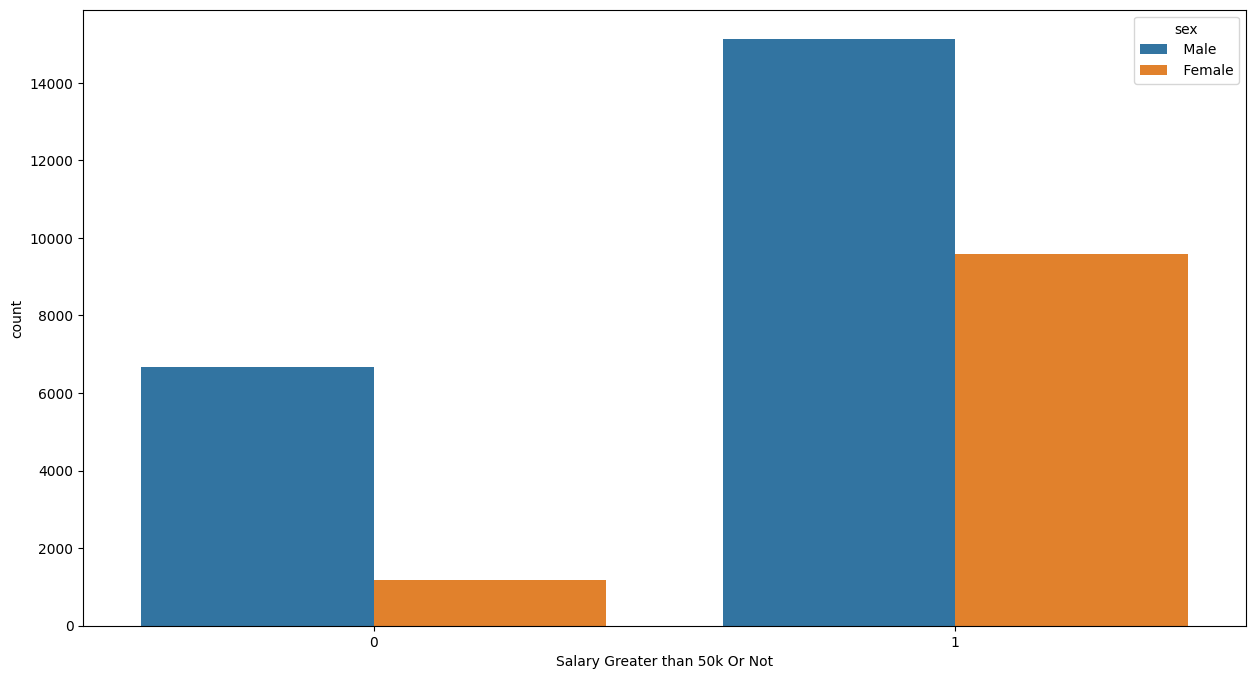

In [17]:
# How Males and Females are has more Salary!
BVA_categorical_plot(df,'sex','Salary Greater than 50k Or Not')

# Male has < 5Ok salary percentage are more 
# Female has very few percentage who's salary is greater  > 50k

Salary Greater than 50k Or Not    0     1
native-country                           
 ?                                8    26
 Canada                           4     2
 China                            3     2
 Columbia                         0     6
 Cuba                             0     4
 Dominican-Republic               0     6
 Ecuador                          0     1
 El-Salvador                      0     8
 England                          2     7
 France                           1     0
 Germany                          1     4
 Greece                           0     1
 Guatemala                        0     2
 Haiti                            0     5
 Honduras                         0     1
 Hong                             0     2
 India                            2     1
 Iran                             2     0
 Ireland                          0     1
 Italy                            0     3
 Jamaica                          0     5
 Japan                            

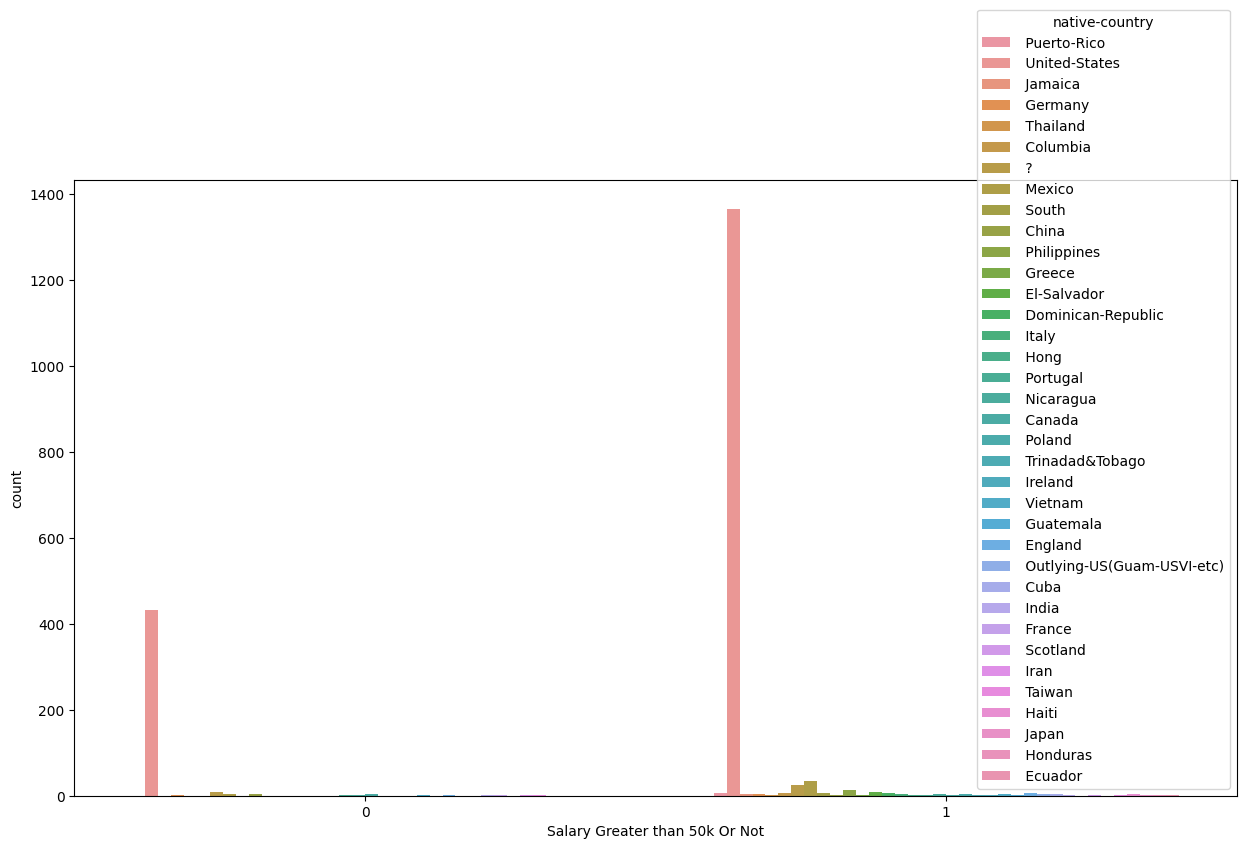

In [18]:
# Which Natives Country has salary greater than 50k or not !!
BVA_categorical_plot(df.sample(2000),'native-country','Salary Greater than 50k Or Not')

# US Natives are More Number of percentage those has < 50k salary  

Salary Greater than 50k Or Not     0      1
race                                       
 Amer-Indian-Eskimo               36    275
 Asian-Pac-Islander              276    763
 Black                           387   2737
 Other                            25    246
 White                          7117  20699


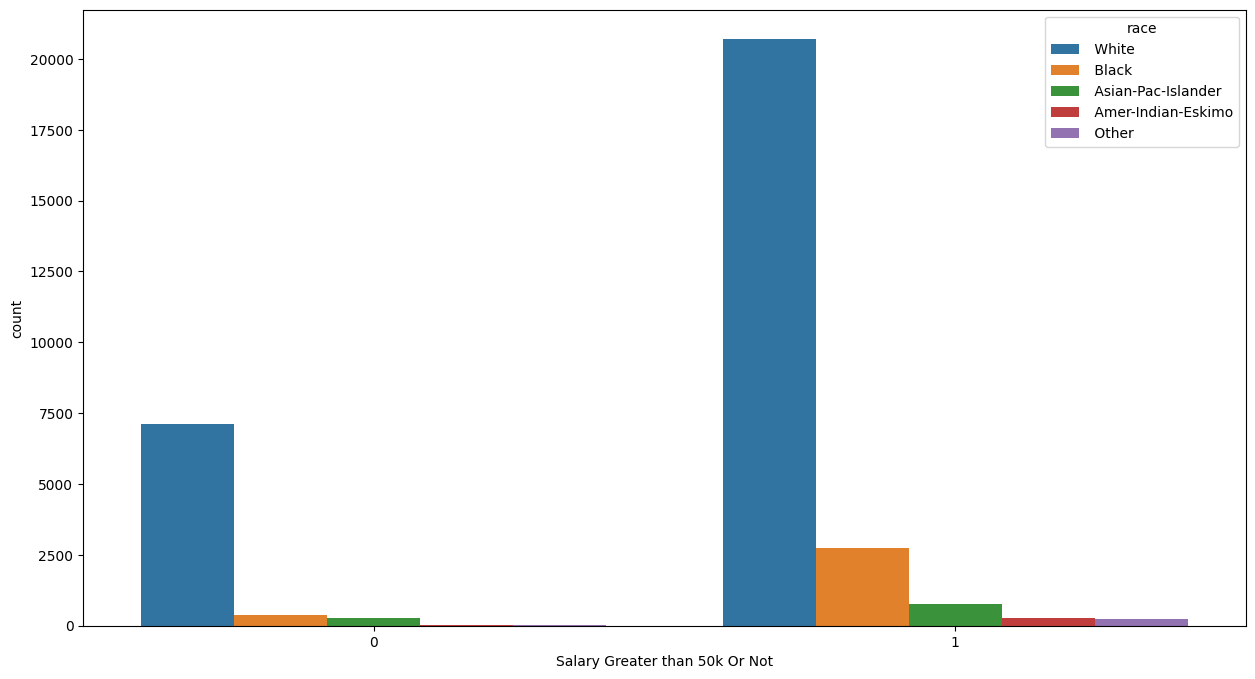

In [19]:
# Is race mattern in salary !
BVA_categorical_plot(df,'race','Salary Greater than 50k Or Not')

# No. of White People showing More counts who has less then <= 50 k salary 

Salary Greater than 50k Or Not          0         1
hours-per-week                  45.473026  38.84021


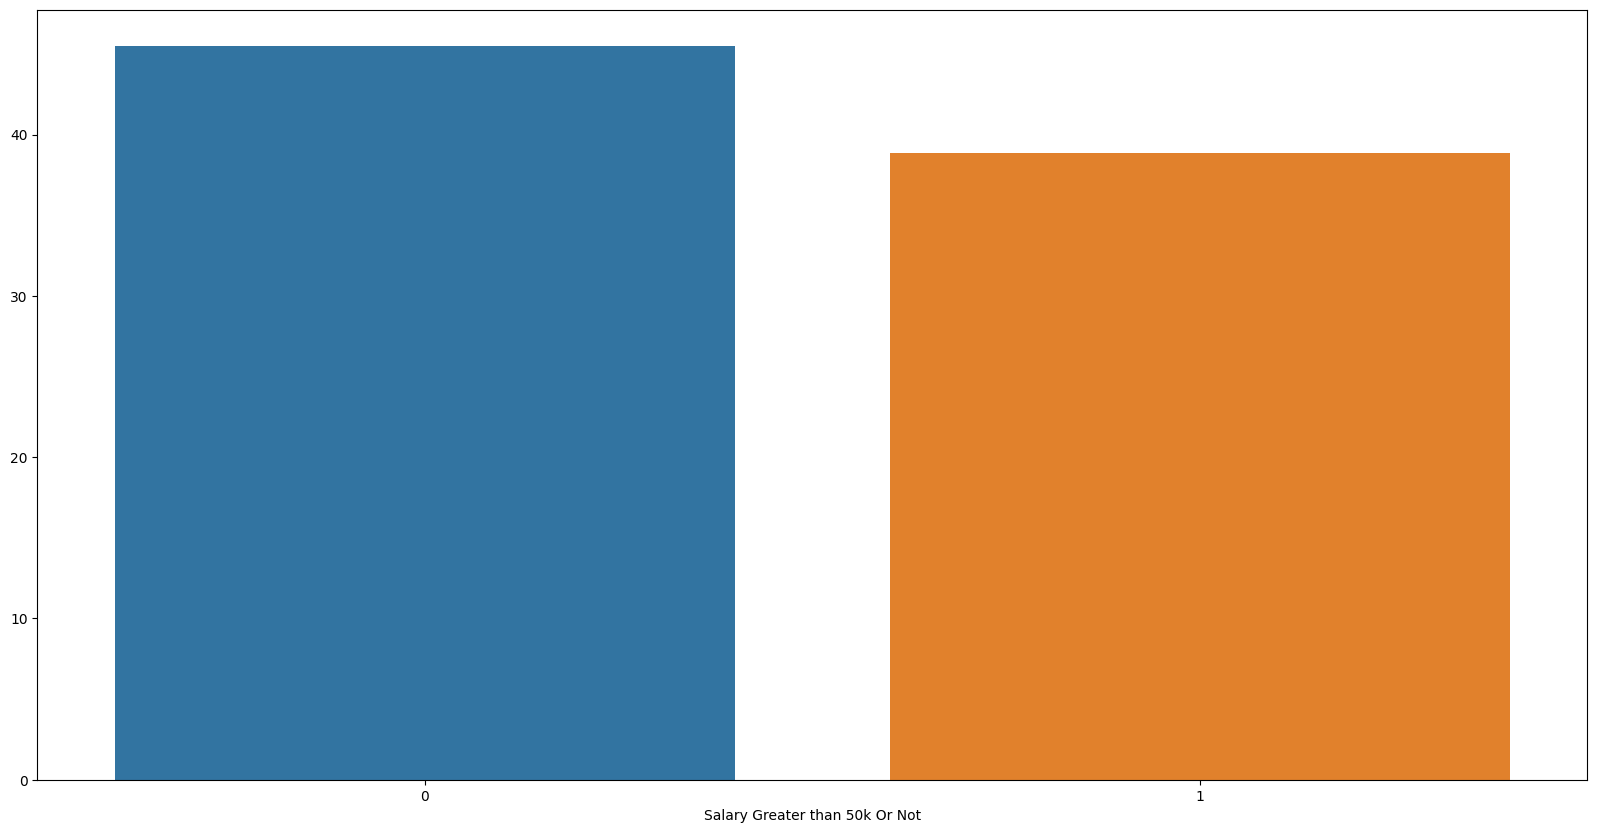

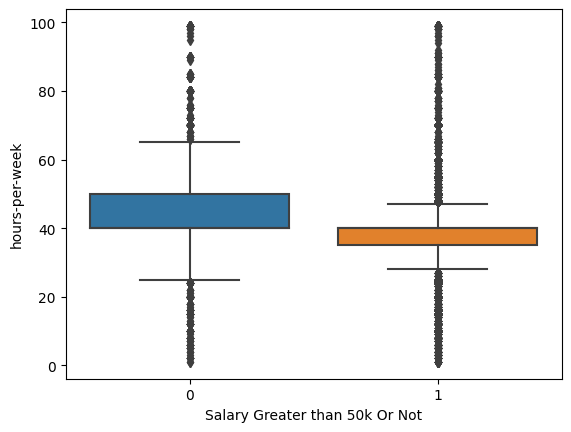

                                hours-per-week  Salary Greater than 50k Or Not
hours-per-week                        1.000000                       -0.229689
Salary Greater than 50k Or Not       -0.229689                        1.000000


In [20]:
# How many Hours per week they were working and there salary !

Bivariate_cont_cat(df,'hours-per-week','Salary Greater than 50k Or Not')
print(df[['hours-per-week','Salary Greater than 50k Or Not']].corr())

# Maximum hours per week peoples has >50k salary
# Also we can see there is an outlier > 60 hours and < 20 hours But we can go with it.

Salary Greater than 50k Or Not            0          1
NetProfit                       3811.140926  95.609547


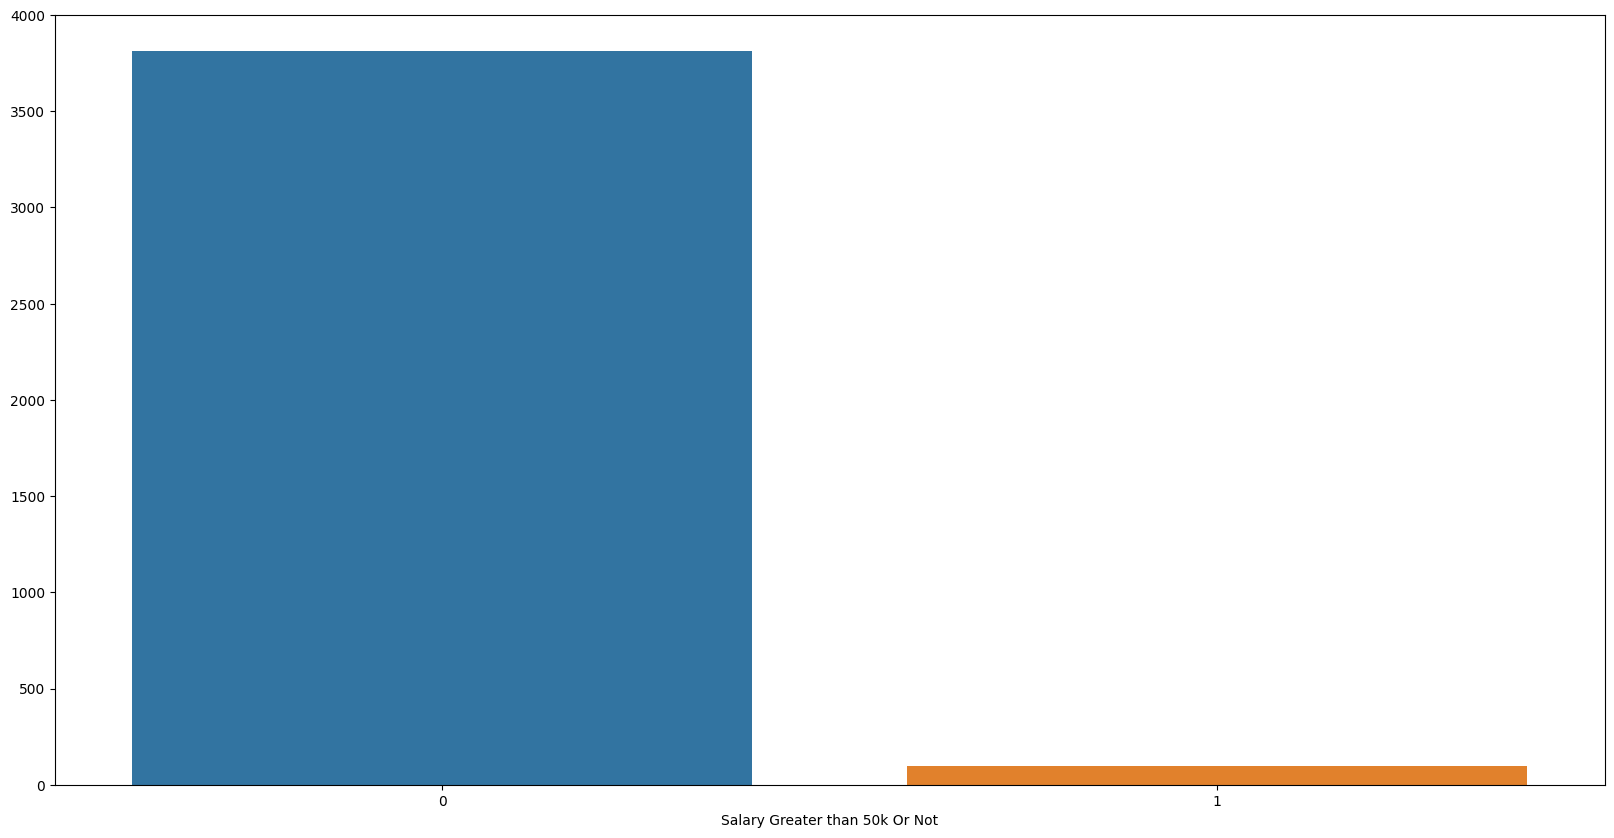

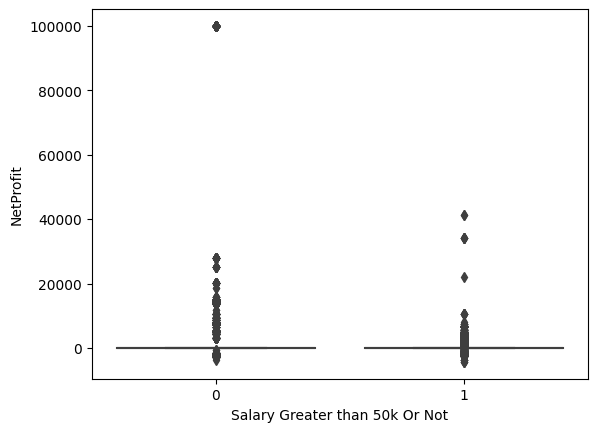

In [21]:
# How capital Gain they have and its salary !
# How capital loss they have and there salary !!

df['NetProfit'] = df['capital-gain'] - df['capital-loss']
Bivariate_cont_cat(df,'NetProfit','Salary Greater than 50k Or Not')

# With Capital Gain and Capital loss we generated a Net Profit
# Total Net Profit has more who's salary > 50k after all the capital loss

Salary Greater than 50k Or Not     0     1
relationship                              
 Husband                        5918  7275
 Not-in-family                   856  7449
 Other-relative                   37   944
 Own-child                        67  5001
 Unmarried                       218  3228
 Wife                            745   823


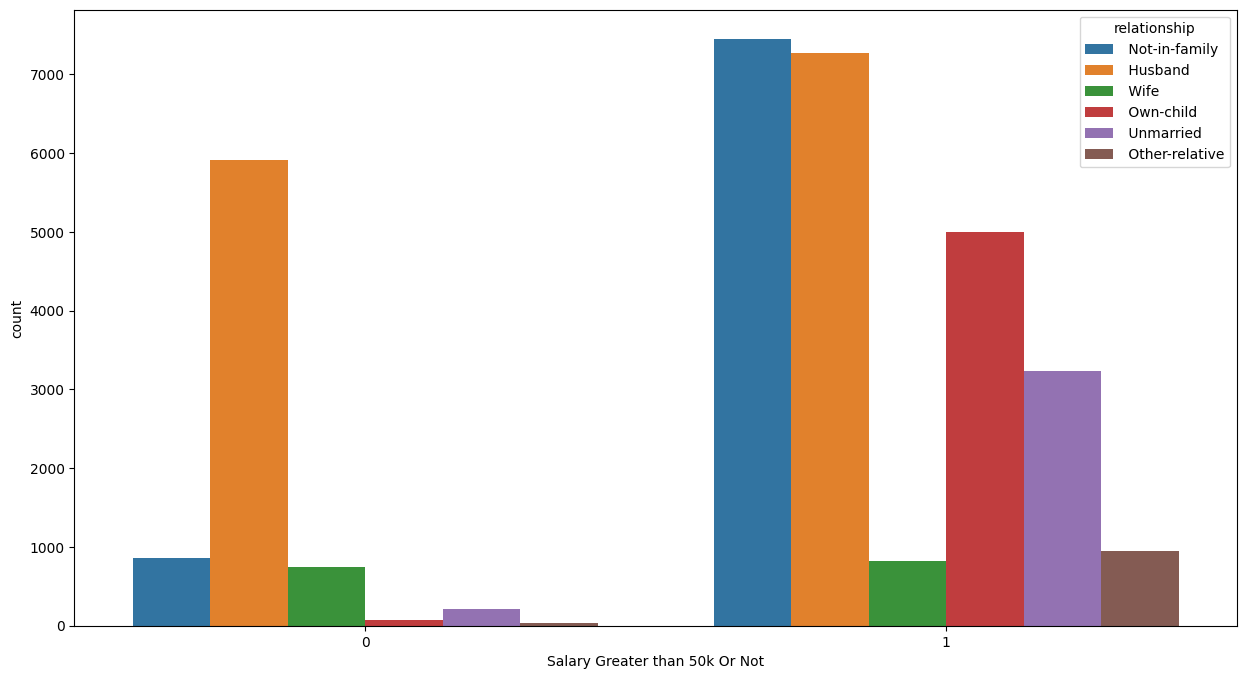

In [22]:
# Which kind of people or relationship people have higher or lower salary !
BVA_categorical_plot(df,'relationship','Salary Greater than 50k Or Not')
# Husband are getting more salary if we ask what kind of relationship person get more > 50 k salary
# Also < 50 salary People are mostly Not In Family, Husband.

Salary Greater than 50k Or Not         0             1
fnlwgt                          188005.0  190340.86517


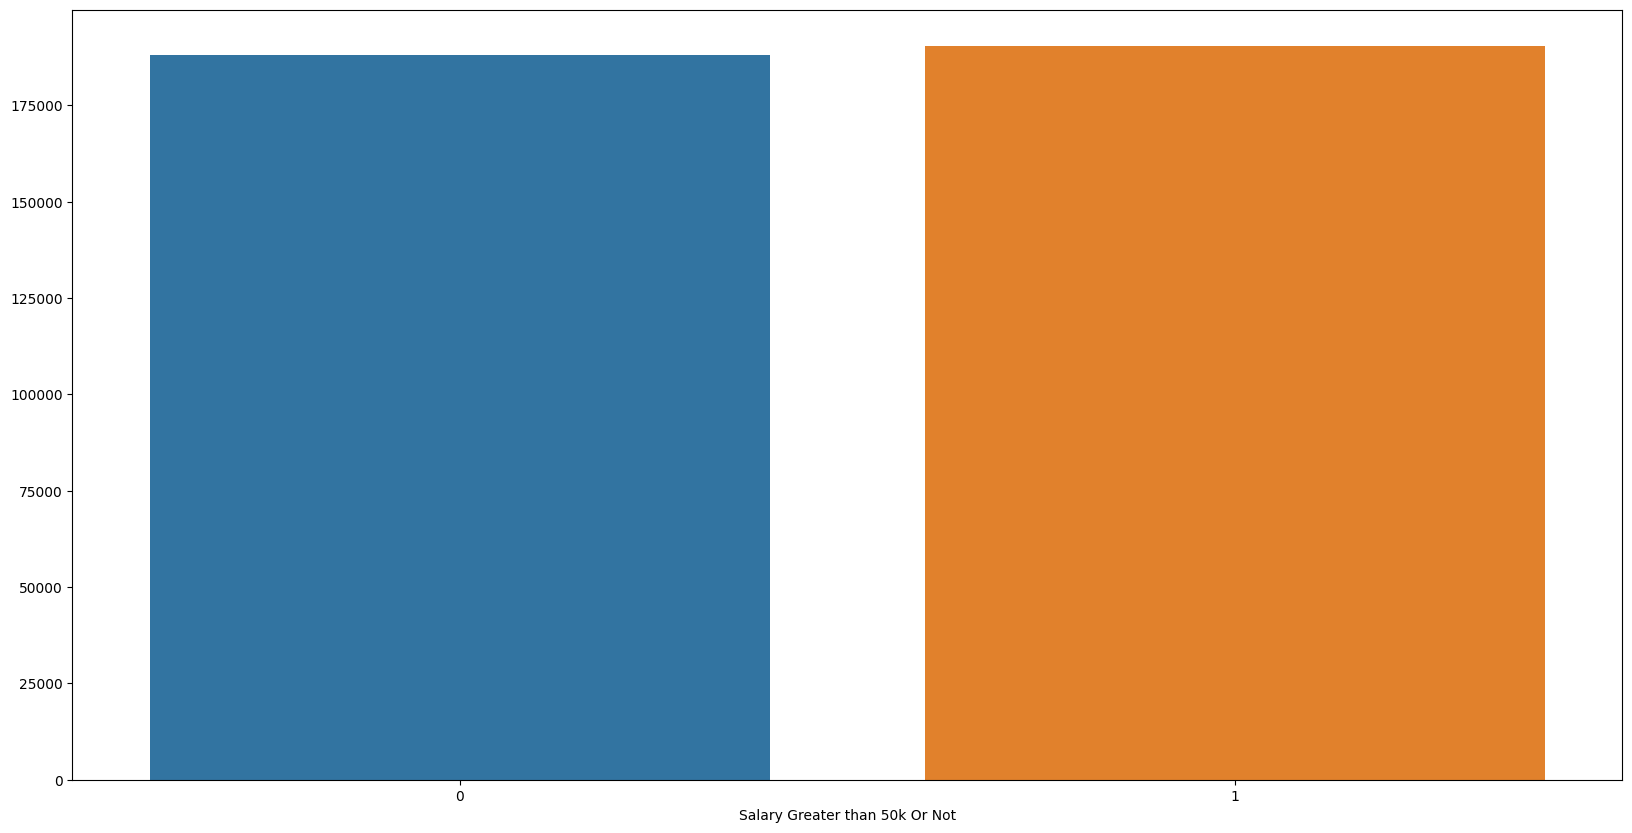

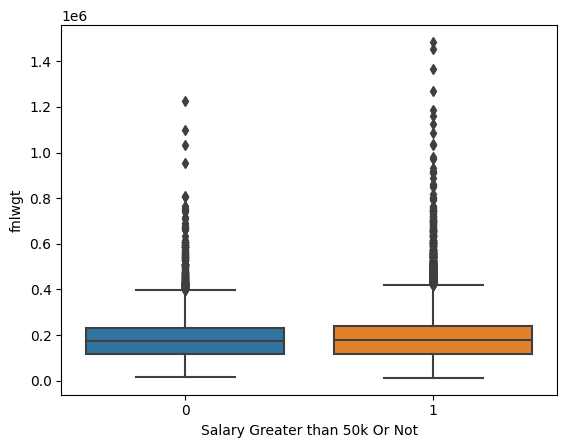

                                  fnlwgt  Salary Greater than 50k Or Not
fnlwgt                          1.000000                        0.009463
Salary Greater than 50k Or Not  0.009463                        1.000000


In [23]:
# is Fnlwgt matter in salary !
Bivariate_cont_cat(df,'fnlwgt','Salary Greater than 50k Or Not')

print(df[['fnlwgt','Salary Greater than 50k Or Not']].corr())


# With this we can't make much any description  
# But it showing  final weight by Population Survey... will be Equal In case of 
# less then <50 or > 50 k Salary

In [32]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'other', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [31]:
# replace ? with other 
df['workclass'] = df['workclass'].replace(" ?","other")

Salary Greater than 50k Or Not     0      1
workclass                                  
 Federal-gov                     371    589
 Local-gov                       617   1476
 Never-worked                      0      7
 Private                        4963  17733
 Self-emp-inc                    622    494
 Self-emp-not-inc                724   1817
 State-gov                       353    945
 Without-pay                       0     14
other                            191   1645


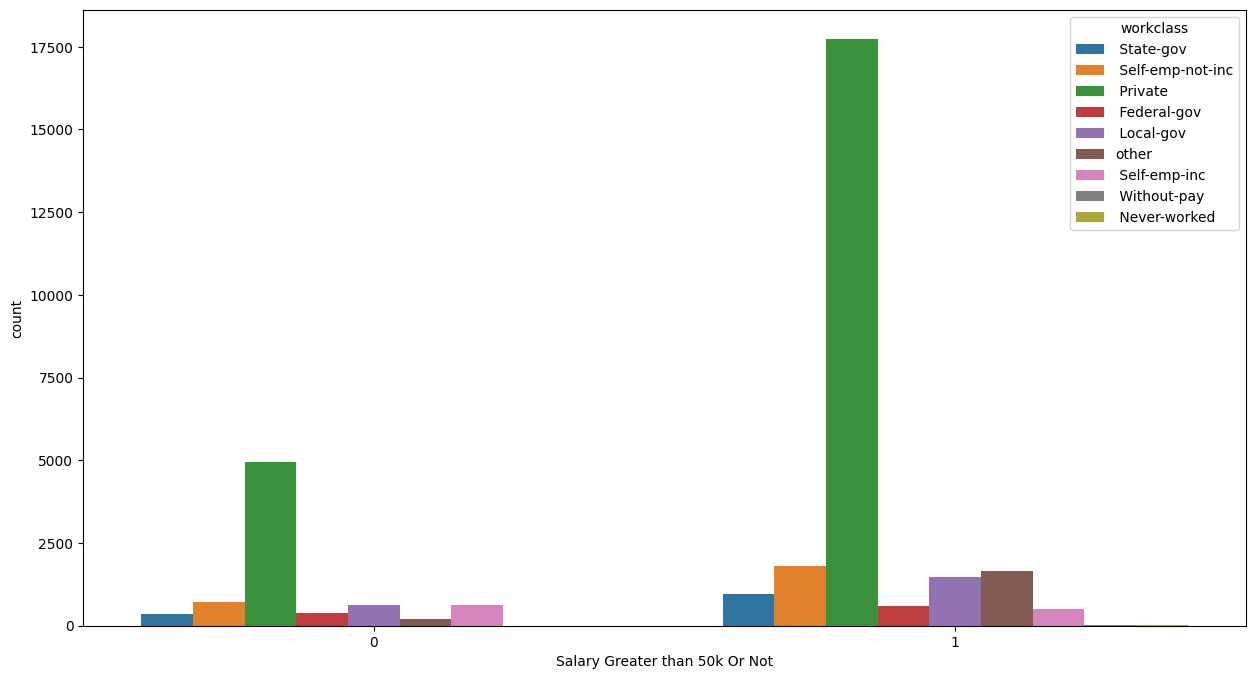

In [33]:
# 
BVA_categorical_plot(df,'workclass','Salary Greater than 50k Or Not')

# People are From Private Workclass shows frequency is higher in case < 50 k salary

Salary Greater than 50k Or Not          0         1
education-num                   11.611657  9.595065


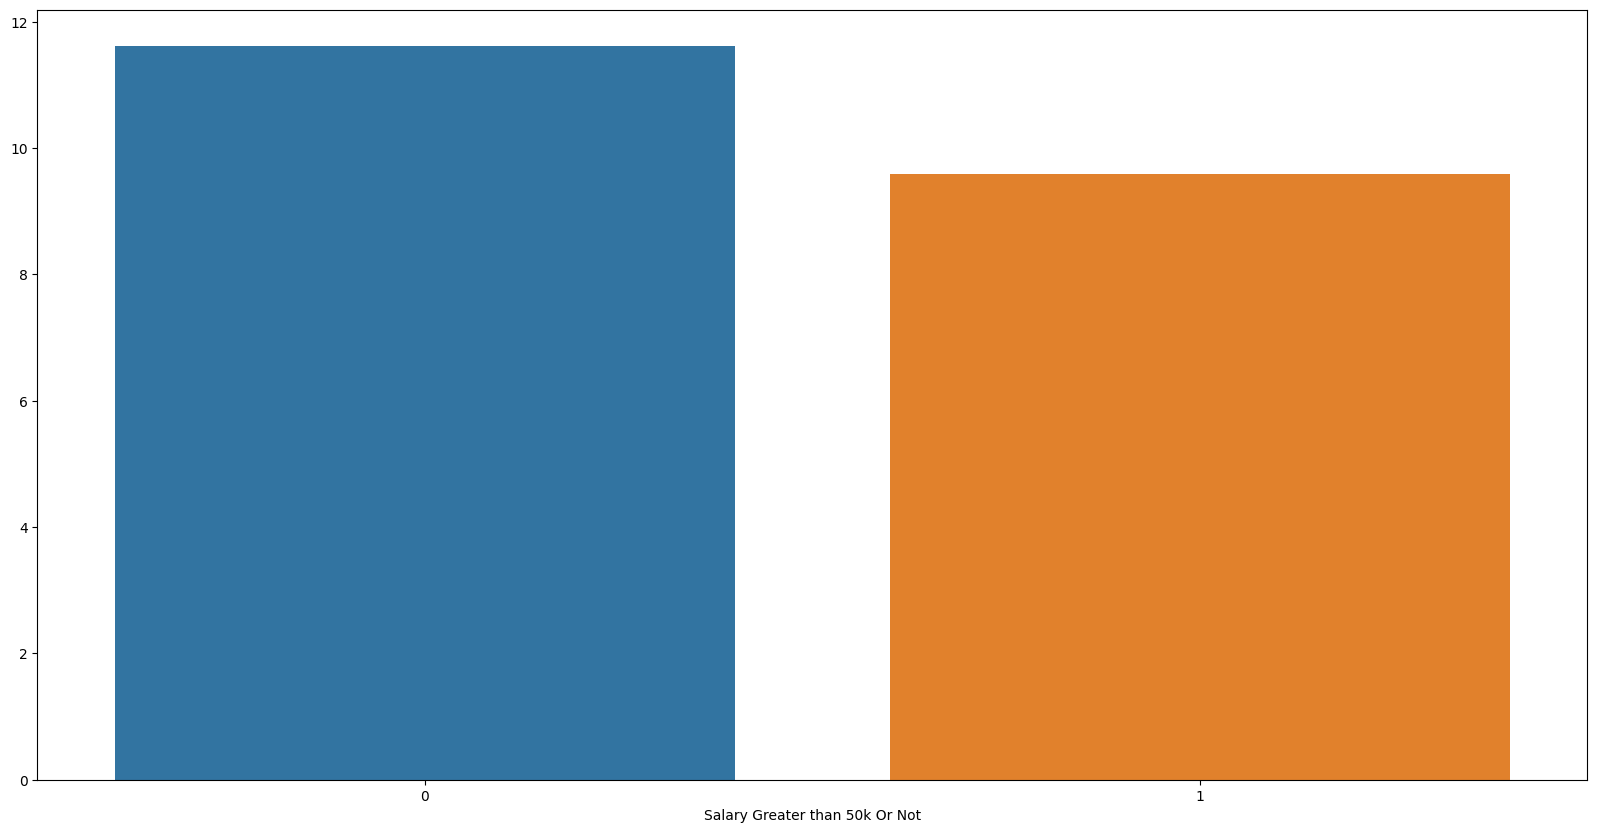

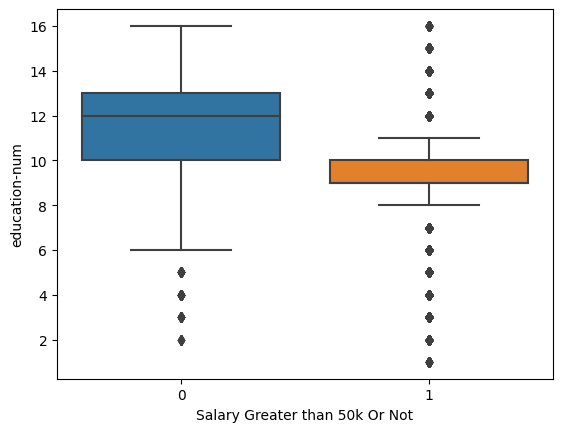

In [26]:
# Is Education Num mattern in Salary !
Bivariate_cont_cat(df,'education-num','Salary Greater than 50k Or Not')

# With Education No. We can clearly seen Salary is > 50 k 

Salary Greater than 50k Or Not     0      1
marital-status                             
 Divorced                        463   3980
 Married-AF-spouse                10     13
 Married-civ-spouse             6692   8284
 Married-spouse-absent            34    384
 Never-married                   491  10192
 Separated                        66    959
 Widowed                          85    908


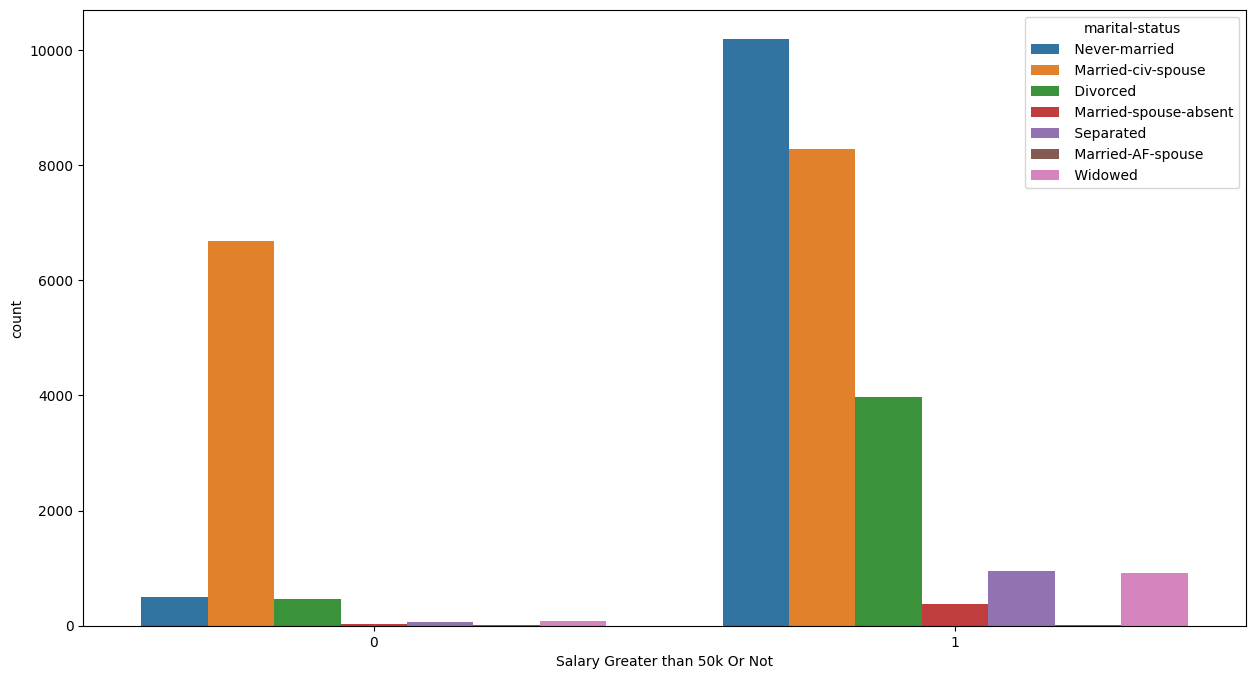

In [27]:
# How many Marital Status has greater Salary or not!
BVA_categorical_plot(df,'marital-status','Salary Greater than 50k Or Not')

# With Marital Status there is Never Married Person and Having < 50 k salary frequency is very high.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   age                             32561 non-null  int64 
 1   workclass                       32561 non-null  object
 2   fnlwgt                          32561 non-null  int64 
 3   education                       32561 non-null  object
 4   education-num                   32561 non-null  int64 
 5   marital-status                  32561 non-null  object
 6   occupation                      32561 non-null  object
 7   relationship                    32561 non-null  object
 8   race                            32561 non-null  object
 9   sex                             32561 non-null  object
 10  capital-gain                    32561 non-null  int64 
 11  capital-loss                    32561 non-null  int64 
 12  hours-per-week                  32561 non-null

In [36]:
# we dont want capital gain and capital loss we already created Net Profit as a new column
df.drop(columns=['capital-gain','capital-loss'],axis=1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24484\3880990716.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

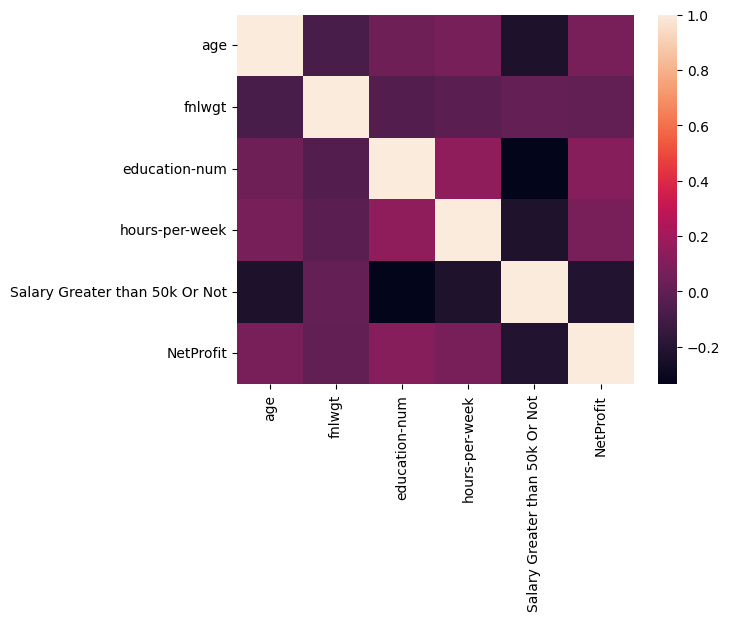

In [37]:
sns.heatmap(df.corr())

# No Variable are correlating Much

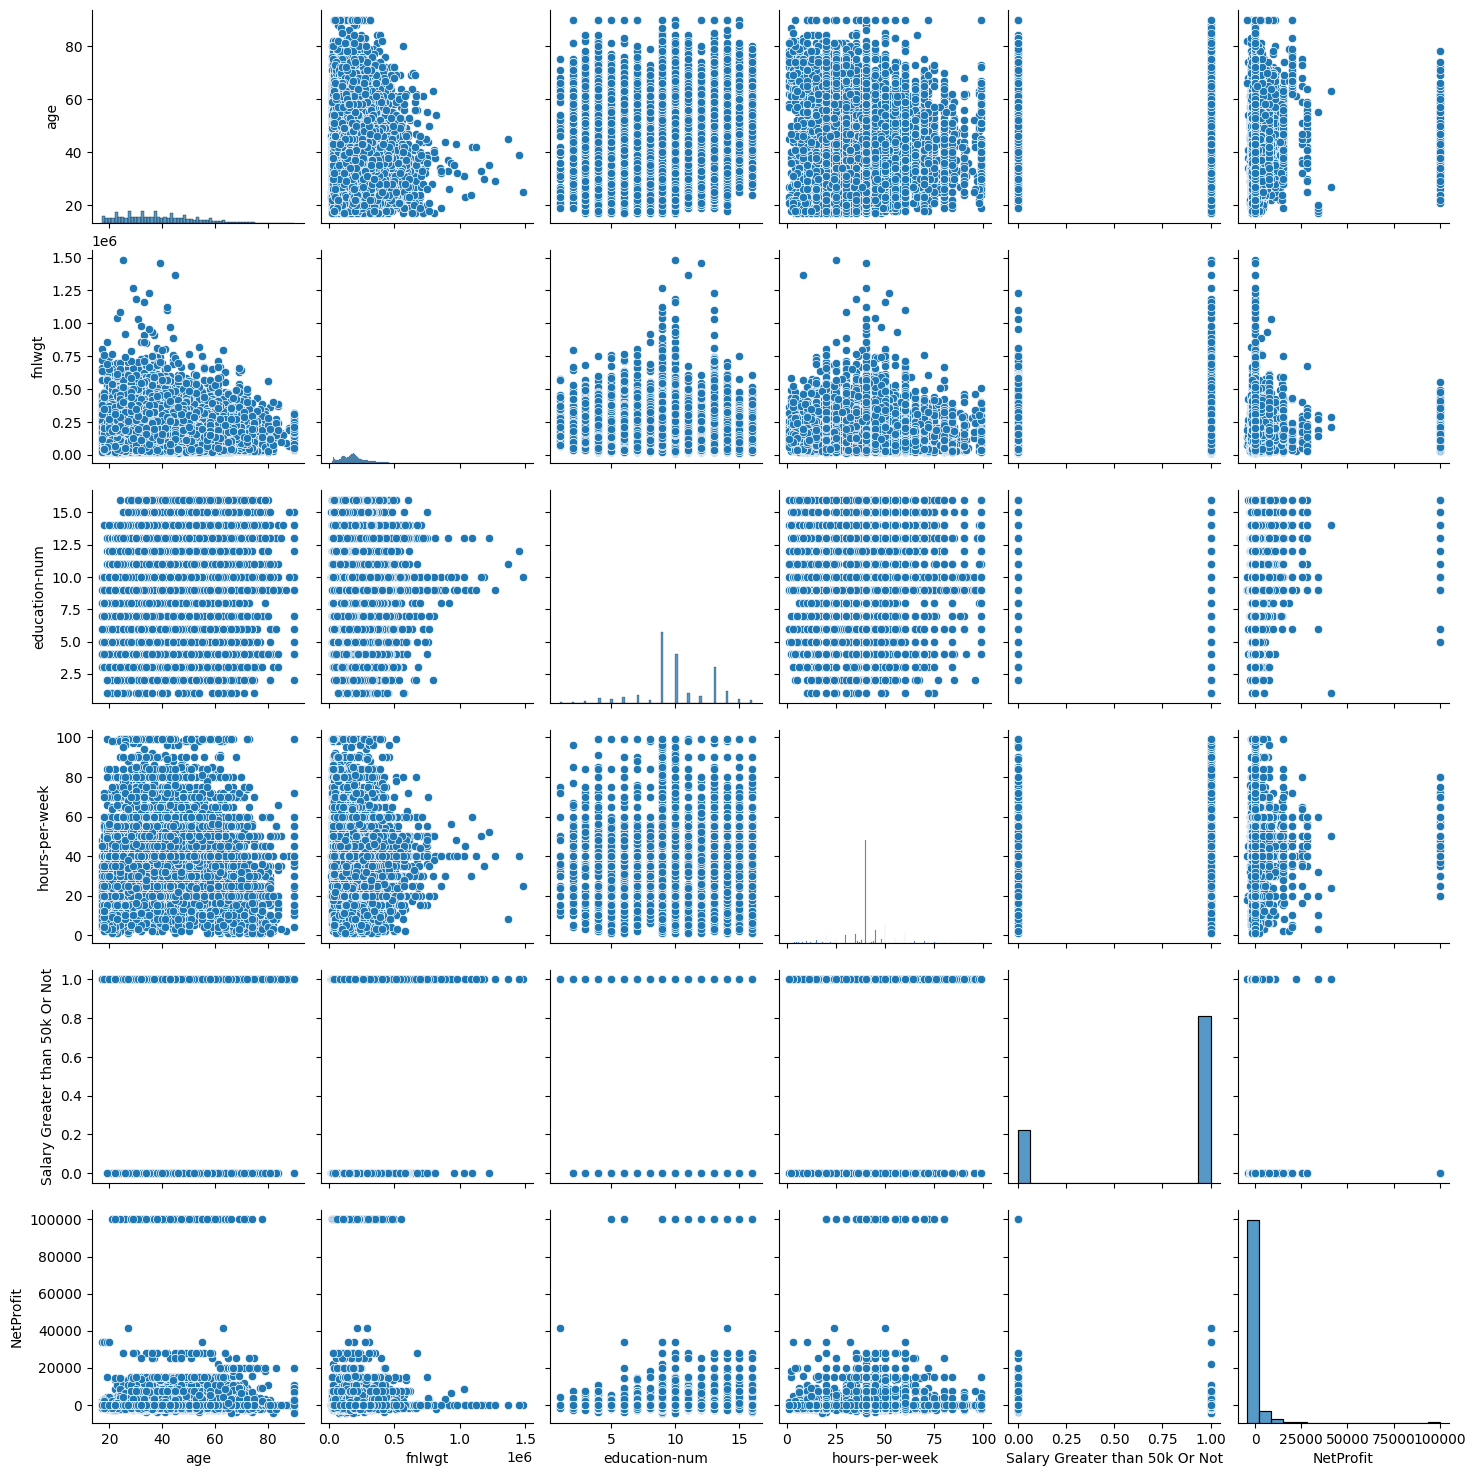

In [41]:
sns.pairplot(df)
# We not getting right now any linear relationship but we will get after Scaling or transformation.

In [ ]:
# Summary 

#Salary and age there is no correlation but with Visualization we can observed >40 age has >50K salary 


In [40]:
df.to_csv('data/final_data.csv')